<a href="https://colab.research.google.com/github/eugetamborelli/challenge1datascience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



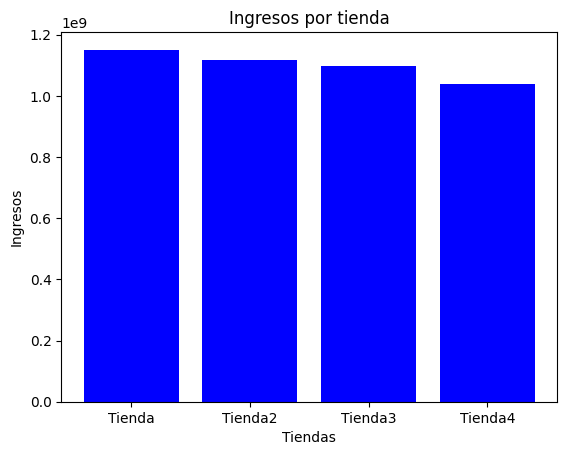

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Siguiendo los datos disponibles en trello, sumé las columnas de precios de cada tienda.

ingresos = {
    'Tienda': tienda['Precio'].sum(),
    'Tienda2': tienda2['Precio'].sum(),
    'Tienda3': tienda3['Precio'].sum(),
    'Tienda4': tienda4['Precio'].sum()
}

#Grafiqué la sumatoria de precios de cada tienda para comparar sus ventas:

plt.bar(ingresos.keys(), ingresos.values(), color='blue')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por tienda')
plt.show()



**Conclusión de esta etapa:**
La tienda 1 tiene más ingresos que todas las demás tiendas, sin embargo este dato no supone que sea la tienda más redituable. Para saberlo es necesario continuar el análisis de datos.

# 2. Ventas por categoría

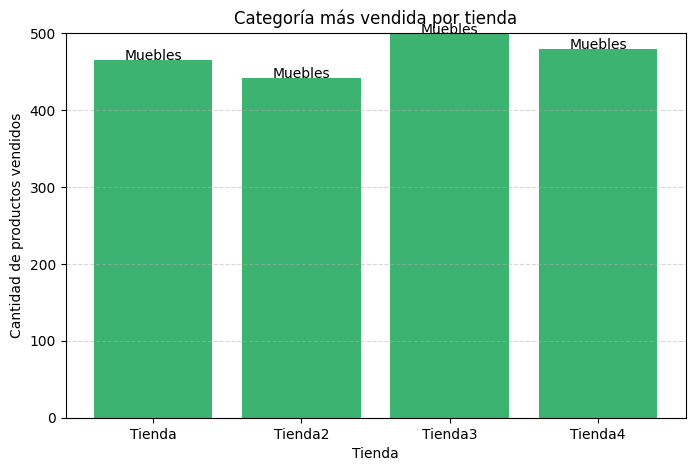

Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos

In [ ]:
# Agrupar y contar categorías por tienda:

categorias_tienda1= tienda.groupby('Categoría del Producto').size()
categorias_tienda2=tienda2.groupby('Categoría del Producto').size()
categorias_tienda3=tienda3.groupby('Categoría del Producto').size()
categorias_tienda4=tienda4.groupby('Categoría del Producto').size()

#Encontrar la categoría más vendida en cada tienda y el número:
categoria_top1 = categorias_tienda1.idxmax()
cantidad_top1 = categorias_tienda1.max()

categoria_top2=categorias_tienda2.idxmax()
cantidad_top2=categorias_tienda2.max()

categoria_top3=categorias_tienda3.idxmax()
cantidad_top3=categorias_tienda3.max()

categoria_top4=categorias_tienda4.idxmax()
cantidad_top4=categorias_tienda4.max()

#Gráfico de las categorías:
# Obtener la categoría más vendida y su cantidad para cada tienda
top_categorias = []
cantidades = []
nombres_tiendas = ['Tienda', 'Tienda2', 'Tienda3', 'Tienda4']

for df in [tienda, tienda2, tienda3, tienda4]:
    conteo = df['Categoría del Producto'].value_counts()
    top_categorias.append(conteo.idxmax())
    cantidades.append(conteo.max())

# Crear gráfico de las 4 tiendas:
plt.figure(figsize=(8, 5))
bars = plt.bar(nombres_tiendas, cantidades, color='mediumseagreen')


for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             top_categorias[i], ha='center', fontsize=10, color='black')

plt.title('Categoría más vendida por tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Tienda')
plt.ylim(0, max(cantidades) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Además imprimí los resultados de cada categoría para corroborar que los datos y el gráfico son correctos.

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}:")
    print(df['Categoría del Producto'].value_counts())
    print()






**Conclusiones de esta etapa:**
La categoría más vendida en las cuatro tiendas fue "Muebles". Siendo la tienda 3 la que más elementos vendió de esa categoría (499), seguida de la tienda 4 (480).



# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda